In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
transform = transforms.ToTensor()
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

Files already downloaded and verified


In [9]:
images, labels = next(iter(test_loader))
images = images.numpy()
labels = labels.numpy()

X = images.reshape(images.shape[0], -1)  # (10000, 3072)
print(f'Feature matrix: {X.shape}')

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

Feature matrix: (10000, 3072)


In [ ]:
def purity_score(predicted_clusters, labels):
    cluster_map = {}
    for i, cluster in enumerate(predicted_clusters):
        if cluster not in cluster_map:
            cluster_map[cluster] = {}
        lbl = labels[i]
        cluster_map[cluster][lbl] = cluster_map[cluster].get(lbl, 0) + 1
    cluster_to_label = {cluster: max(freq_dict, key=freq_dict.get) for cluster, freq_dict in cluster_map.items()}
    correct = sum(labels[i] == cluster_to_label[cluster] for i, cluster in enumerate(predicted_clusters))
    return correct / len(labels)

In [ ]:
dims = [5, 10, 50, 100, 500]
purity_scores = []

for d in dims:
    pca = PCA(n_components=d)
    X_pca = pca.fit_transform(X_normalized)

    kmeans_model = KMeans(n_clusters=10, random_state=0)
    predicted_clusters = kmeans_model.fit_predict(X_pca)

    score = purity_score(predicted_clusters, labels)
    purity_scores.append(score)
    print(f"PCA dim: {d}, Purity: {score:.4f}")


PCA dim: 5, Purity: 0.2169
PCA dim: 10, Purity: 0.2156
PCA dim: 50, Purity: 0.2221
PCA dim: 100, Purity: 0.2152
PCA dim: 500, Purity: 0.2171


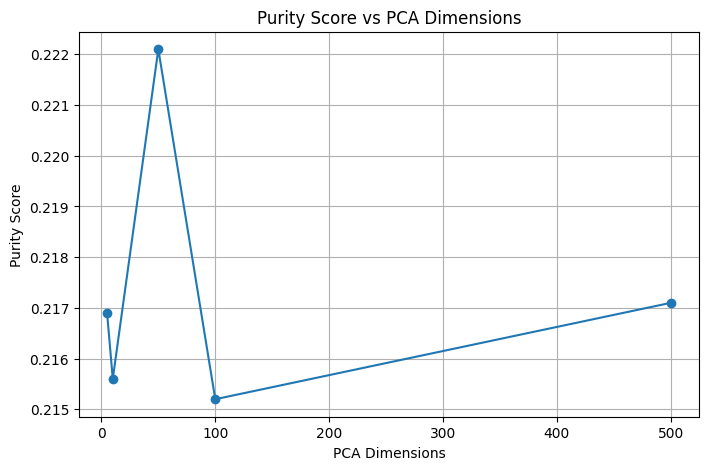

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(dims, purity_scores, marker='o')
plt.title("Purity Score vs PCA Dimensions")
plt.xlabel("PCA Dimensions")
plt.ylabel("Purity Score")
plt.grid(True)
plt.show()